# Sentinel 2 tiles

Some plots using the sentinel 2 tiles geometry and the Norwegian AOI for the NBS project.

In [82]:
import geopandas as gpd
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' # Necessary to be able to read KML files

## Sentinel 2 tiles

In [83]:
# Sentinel-2 tiling grid from Copernicus
# Source: https://sentinels.copernicus.eu/web/sentinel/missions/sentinel-2/data-products

In [84]:
tiles_file = '/home/nbs/nbs_footprints/S2A_OPER_GIP_TILPAR_MPC__20151209T095117_V20150622T000000_21000101T000000_B00.kml'

In [85]:
tiles = gpd.read_file(tiles_file, driver='KML')

/modules/centos7/conda/Feb2021/envs/production-04-2021/lib/python3.8/site-packages/geopandas/geodataframe.py:577: RuntimeWarning: Sequential read of iterator was interrupted. Resetting iterator. This can negatively impact the performance.
  for feature in features_lst:


### Tiles plot over a selected geographical zone

In [86]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
# Select Norway
select = world[world.name == 'Norway']
# Select Europe
#select = world[world.continent == 'Europe']

In [87]:
# Get coordinates of 'center' point of each tile
# used only to add the tile name in the plot
tiles['coords'] = tiles['geometry'].apply(lambda x: x.representative_point().coords[:])
tiles['coords'] = [coords[0] for coords in tiles['coords']]

In [88]:
# Select tiles that are within area of interest
# Keeps the geometry of the full tile
tiles_subset = gpd.sjoin(tiles, select, how="inner", op='intersects')
len(tiles_subset)

102

In [89]:
# Get intersection of zone and tiles
# The geometry will be the intersection of the two geometries (ie partial tiles)
tiles_subset = gpd.overlay(select, tiles, how='intersection')
len(tiles_subset)

102

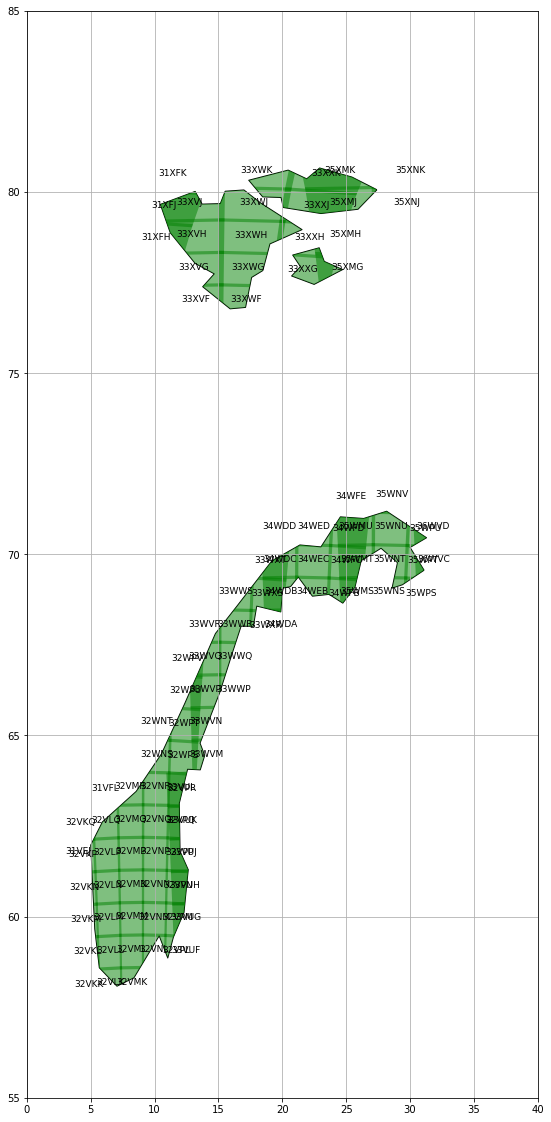

In [90]:
# Overlay tiles in the geographical area selected
fig, ax = plt.subplots(figsize=(15,20))
select.plot(ax=ax, color='white', edgecolor='black', figsize=(15, 15))
tiles_subset.plot(ax=ax, color='green', alpha=0.5)
ax.grid('on')
ax.set_xlim([0, 40])
ax.set_ylim([55, 85])
#ax.set_xlim([0, 15])
#ax.set_ylim([55, 65])
for idx, row in tiles_subset.iterrows():
    plt.annotate(text=row['Name'], xy=row['coords'], horizontalalignment='center',fontsize=9)
plt.show()

## NBS Areas Of Interest

In [91]:
# NBS AOIs for Sentinel 2
footprints_dir = pathlib.Path('/home/nbs/file_conversion/nbs_tools/cfg/footprints')
svalbard = gpd.read_file(footprints_dir / 's2_svalbard.geojson')
mainland = gpd.read_file(footprints_dir / 's2_mainland_bjornoya.geojson')
janmayen = gpd.read_file(footprints_dir / 's2_janmayen.geojson')
# All AOIs joined
nbs_aoi = mainland.append(janmayen).append(svalbard)
# colhub AOI
colhub_aoi = gpd.read_file(footprints_dir / 'colhub_aoi.geojson')
# AOI used for datagaps computations -> not used in colhub (old or new)
trygve_aoi = gpd.read_file('/home/nbs/dhus_opensearch_data_gaps/footprints/nbs_aoi_NH.geojson')

### Plot AOIs

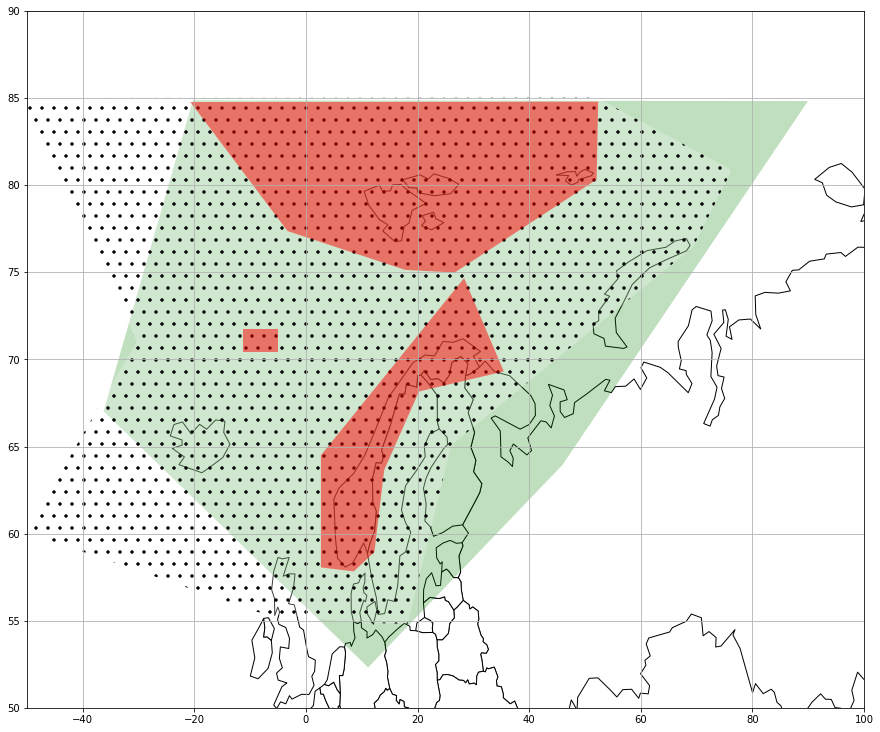

In [92]:
europe = world[world.continent == 'Europe']
fig, ax = plt.subplots(figsize=(15,20))
europe.plot(ax=ax, color='white', edgecolor='black', figsize=(15, 15))
colhub_aoi.plot(ax=ax, color='green', alpha=0.25)
trygve_aoi.plot(ax=ax, hatch='.', alpha=0.25, color='white')
nbs_aoi.plot(ax=ax, color='red', alpha=0.5)
ax.grid('on')
ax.set_xlim([-50, 100])
ax.set_ylim([50, 90])
plt.show()

### Plot AOIs for NIBIO datacubes

In [93]:
# NBS AOIs for NIBIO Sentinel 2
footprints_dir = pathlib.Path('/home/nbs/file_conversion/nbs_tools/cfg/footprints')
nibio_zone1 = gpd.read_file(footprints_dir / 's2_barkebille.geojson')
nibio_zone2 = gpd.read_file(footprints_dir / 's2_barkebille_extended.geojson')

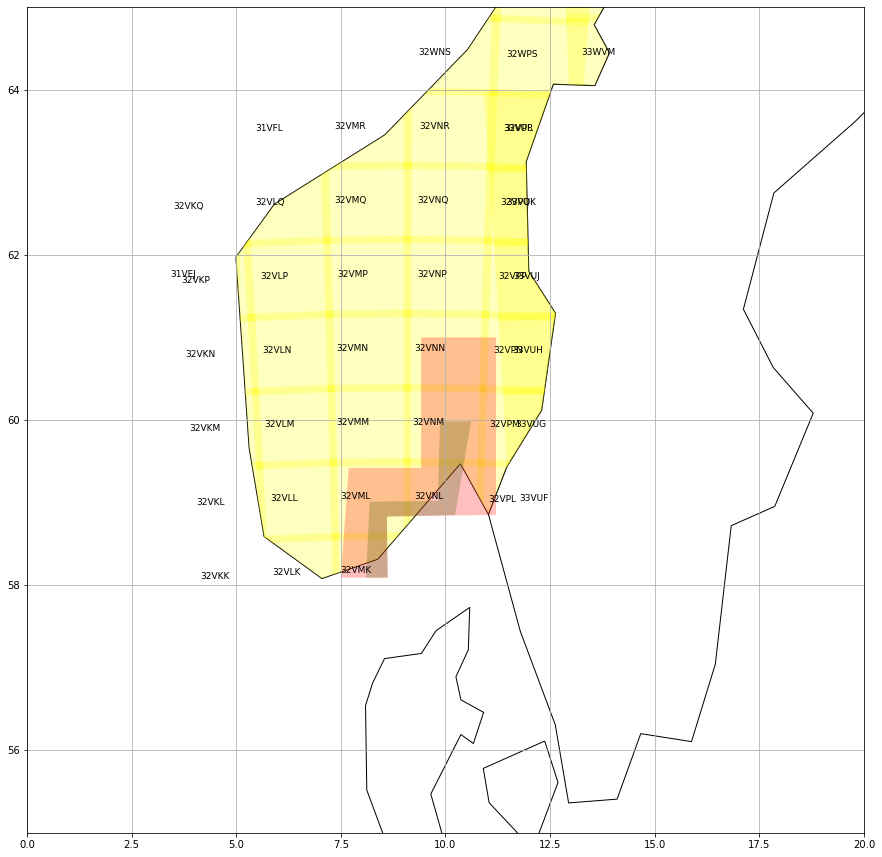

In [94]:
europe = world[world.continent == 'Europe']
fig, ax = plt.subplots(figsize=(15,20))
europe.plot(ax=ax, color='white', edgecolor='black', figsize=(15, 15))
tiles_subset.plot(ax=ax, color='yellow', alpha=0.25)
nibio_zone1.plot(ax=ax, color='green', alpha=0.25)
nibio_zone2.plot(ax=ax, color='red', alpha=0.25)
for idx, row in tiles_subset.iterrows():
    plt.annotate(text=row['Name'], xy=row['coords'], horizontalalignment='right',fontsize=9)
ax.grid('on')
ax.set_xlim([0, 20])
ax.set_ylim([55, 65])
plt.show()

In [95]:
# Check which tiles are in each footprint

# zone 1
tiles_select = gpd.overlay(nibio_zone1, tiles, how='intersection')
print(f"Number of S2 tiles within NIBIO zone 1: {len(tiles_select)}")
print(tiles_select.Name)

# zone 2
tiles_select = gpd.overlay(nibio_zone2, tiles, how='intersection')
print(f"Number of S2 tiles within NIBIO zone 2 - ie the extended one: {len(tiles_select)}")
print(tiles_select.Name)

Number of S2 tiles within NIBIO zone 1: 4
0    32VMK
1    32VML
2    32VNL
3    32VNM
Name: Name, dtype: object
Number of S2 tiles within NIBIO zone 2 - ie the extended one: 8
0    32VMK
1    32VML
2    32VNL
3    32VNM
4    32VNN
5    32VPL
6    32VPM
7    32VPN
Name: Name, dtype: object


## Select tiles in AOI

In [96]:
# List of tiles names within NBS AOI
# Geometry is the intersection of the tile and the aoi (so partial tiles)
tiles_select = gpd.overlay(nbs_aoi, tiles, how='intersection')
print(f"Number of S2 tiles within NBS AOI: {len(tiles_select)}")
tiles_select.Name

Number of S2 tiles within NBS AOI: 329


0      31VDE
1      31VDF
2      31VDG
3      31VDH
4      31VDJ
       ...  
324    39XWM
325    39XWN
326    39XWP
327    40XDQ
328    40XDR
Name: Name, Length: 329, dtype: object

In [97]:
# Other method to get intersection
# Keeps the geometry of the full tile
tiles_select = gpd.sjoin(tiles, nbs_aoi, how="inner", op='intersects')
print(f"Number of S2 tiles within NBS AOI: {len(tiles_select)}")

Number of S2 tiles within NBS AOI: 329


### Plot tiles within AOI

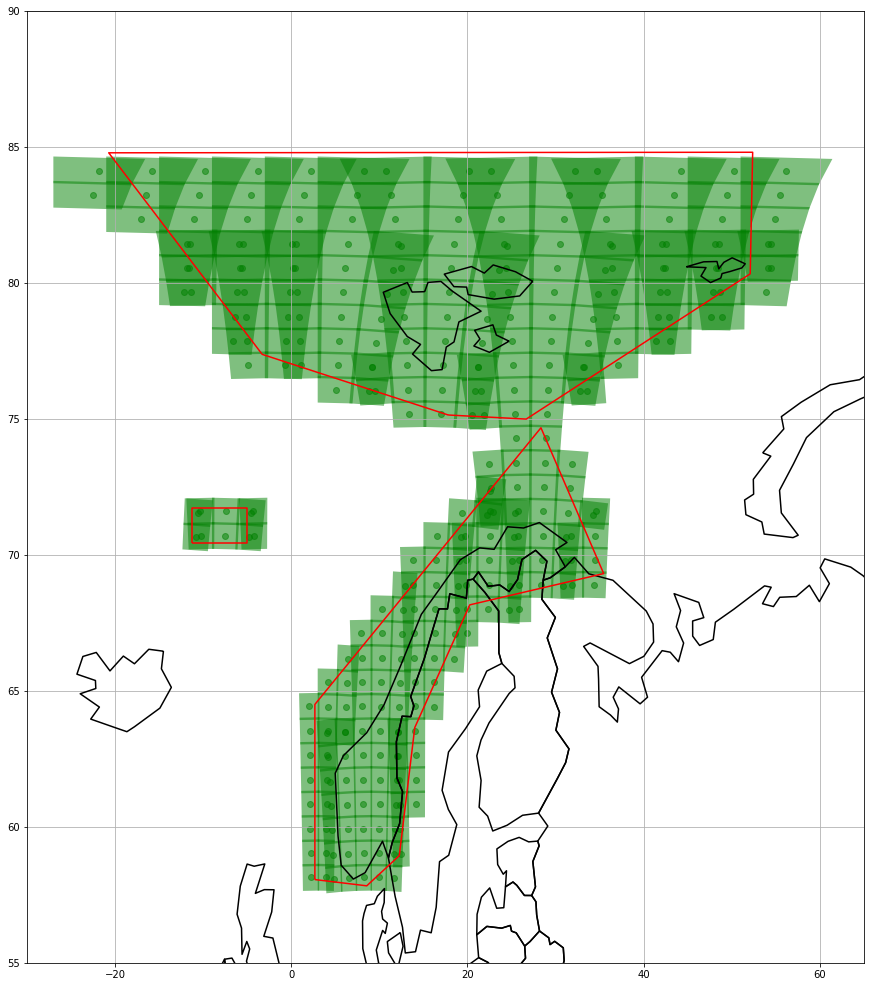

In [98]:
europe = world[world.continent == 'Europe']
fig, ax = plt.subplots(figsize=(15,20))
europe.boundary.plot(ax=ax,color='black', figsize=(15, 15))
nbs_aoi.boundary.plot(ax=ax, color='red')
tiles_select.plot(ax=ax, color='green', alpha=0.5)
ax.grid('on')
ax.set_xlim([-30, 65])
ax.set_ylim([55, 90])
#for idx, row in tiles_select.iterrows():
#    plt.annotate(text=row['Name'], xy=row['coords'], horizontalalignment='center',fontsize=9)
plt.show()